# Project 1: Differentially Expressed Genes in Cell Lines 

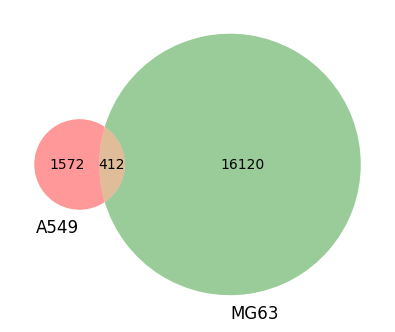

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

a= "/Users/rzhuang/Documents/ReddyWork/a549.txt" #a549
b= "/Users/rzhuang/Documents/ReddyWork/mg63.txt" #mg63
c= "/Users/rzhuang/Documents/ReddyWork/thp1.txt" #thp1

lista= [line.strip() for line in open(a)]
listb= [line.strip() for line in open(b)]
listc= [line.strip() for line in open(c)]

def intersect(a, b):
    count= 0
    for l in a:
        if l in b:
            count+=1
    return count

def diff(a,b):
    count= 0
    for l in a: 
        if l not in b: 
            count+= 1
    return count

venn2(subsets= {'10':diff(lista,listb), "01":intersect(lista,listb), "11":diff(listb,lista)}, 
     set_labels = ("A549", "MG63"))
plt.show()

In [2]:
set(lista[:5]).intersection({'ENSG00000000003.13'})

{'ENSG00000000003.13'}

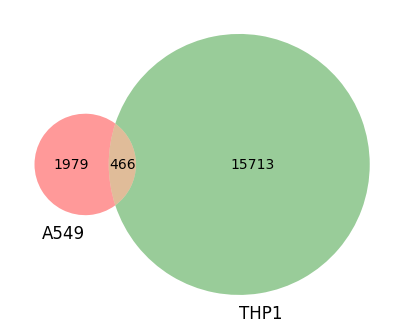

In [3]:
venn2(subsets= {'10':diff(lista,listc), "01":intersect(lista,listc), "11":diff(listc,lista)}, 
     set_labels = ("A549", "THP1"))
plt.show()

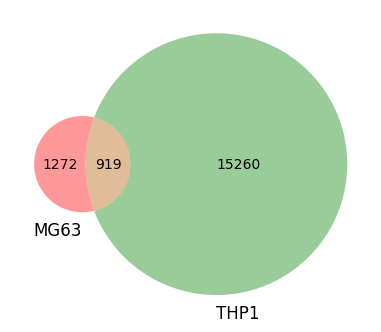

In [4]:
venn2(subsets= {'10':diff(listb,listc), "01":intersect(listb,listc), "11":diff(listc,listb)}, 
     set_labels = ("MG63", "THP1"))
plt.show()

In [5]:
import goatools
# Get http://geneontology.org/ontology/go-basic.obo
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo('goslim_generic.obo')


# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
from goatools.base import download_ncbi_associations
gene2go = download_ncbi_associations()

from __future__ import print_function
from goatools.associations import read_ncbi_gene2go

geneid2gos_h = read_ncbi_gene2go("gene2go", taxids=[9606])

print("{N:,} annotated human genes".format(N=len(geneid2gos_h)))


  EXISTS: goslim_generic.obo
  EXISTS: gene2go
18,832 annotated human genes


In [6]:
from goatools.obo_parser import GODag

obodag = GODag(obo_file="goslim_generic.obo")  #goslim_basic.obo

load obo file goslim_generic.obo
goslim_generic.obo: fmt(1.2) rel(None) 212 GO Terms


In [7]:
?GODag

In [8]:
import sys
sys.path.append('/Users/rzhuang/Documents/ReddyWork/')
import genes_NCBI_9606_ProteinCoding
from genes_NCBI_9606_ProteinCoding import GeneID2nt as GeneID2nt_h

In [9]:
from goatools.go_enrichment import GOEnrichmentStudy
import scipy.stats as stats

goeaobj = GOEnrichmentStudy(
        GeneID2nt_h.keys(), # List of human protein-coding genes
        geneid2gos_h, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method

fisher module not installed.  Falling back on scipy.stats.fisher_exact
18,336 out of 20,913 population items found in association


Notes for week: 
-Need to find way to map current accessions, different from in background human genes, to specific gene ID
-gene IDs located in background py file
-convert ensembl gene ids to gene ids

In [10]:
import mygene

mg = mygene.MyGeneInfo()

def ensembl(genelist): 
    nlist= []
    for gene in genelist: 
        ndeci= gene.find('.')
        nlist.append(gene[:ndeci])
    return nlist


nlista= ensembl(lista)

hitsa= mg.querymany(nlista, scopes= 'ensembl.gene', fields= 'entrezgene', species= 'human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-17692...done.
Finished.
189 input query terms found dup hits:
	[(u'ENSG00000261609', 2), (u'ENSG00000058600', 2), (u'ENSG00000117395', 2), (u'ENSG00000108654', 3),
20 input query terms found no hit:
	[u'ENSG00000155640', u'ENSG00000168260', u'ENSG00000173088', u'ENSG00000205246', u'ENSG00000243566',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [11]:
nlistb= ensembl(listb)
hitsb= mg.querymany(nlistb, scopes= 'ensembl.gene', fields= 'entrezgene', species= 'human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-16532...done.
Finished.
188 input query terms found dup hits:
	[(u'ENSG00000261609', 2), (u'ENSG00000058600', 2), (u'ENSG00000117395', 2), (u'ENSG00000108654', 3),
19 input query terms found no hit:
	[u'ENSG00000155640', u'ENSG00000168260', u'ENSG00000173088', u'ENSG00000184682', u'ENSG00000205246',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [12]:
nlistc= ensembl(listc)
hitsc= mg.querymany(nlistc, scopes= 'ensembl.gene', fields= 'entrezgene', species= 'human')

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-16179...done.
Finished.
188 input query terms found dup hits:
	[(u'ENSG00000261609', 2), (u'ENSG00000204220', 2), (u'ENSG00000058600', 2), (u'ENSG00000108654', 3),
21 input query terms found no hit:
	[u'ENSG00000155640', u'ENSG00000168260', u'ENSG00000173088', u'ENSG00000205246', u'ENSG00000243566',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [13]:
def entrez(hits):
    entreza= []
    for gene in hits: 
        if 'entrezgene' in gene.keys():
            entreza.append(gene['entrezgene'])
    return entreza

entrez(hitsb)[:10]

[7105, 8813, 57147, 55732, 2268, 3075, 2519, 2729, 4800, 90529]

In [14]:
type(entrez(hitsb)[0])

int

In [15]:
len(set(entrez(hitsb)).intersection(set(GeneID2nt_h.keys())))

16138

In [16]:

goea_results_all_a = goeaobj.run_study(entrez(hitsa))
goea_results_sig_a = [r for r in goea_results_all_a if r.p_fdr_bh < 0.05]

Calculating uncorrected p-values using fisher_scipy_stats
16,568 out of 17,456 study items found in association
Running multitest correction: statsmodels fdr_bh
  127 GO terms are associated with 14,444 of 17,456 study items
  127 GO terms are associated with 15,949 of 20,913 population items


In [17]:
goea_results_all_b = goeaobj.run_study(entrez(hitsb))
goea_results_sig_b = [r for r in goea_results_all_b if r.p_fdr_bh < 0.05]

Calculating uncorrected p-values using fisher_scipy_stats
15,530 out of 16,344 study items found in association
Running multitest correction: statsmodels fdr_bh
  126 GO terms are associated with 13,564 of 16,344 study items
  127 GO terms are associated with 15,949 of 20,913 population items


In [18]:
goea_results_all_c = goeaobj.run_study(entrez(hitsc))
goea_results_sig_c = [r for r in goea_results_all_c if r.p_fdr_bh < 0.05]

Calculating uncorrected p-values using fisher_scipy_stats
15,199 out of 15,992 study items found in association
Running multitest correction: statsmodels fdr_bh
  127 GO terms are associated with 13,259 of 15,992 study items
  127 GO terms are associated with 15,949 of 20,913 population items


In [19]:
print(goea_results_sig_a[2].__dict__.keys())
print(goea_results_sig_a[2].__dict__.get('p_fdr_bh'))
goindex= goea_results_sig_a[2].__dict__.get('GO').index(':')
goid= int(goea_results_sig_a[2].__dict__.get('GO')[goindex+1:])
print(goea_results_sig_a[2].__dict__.get('GO'))
print(goea_results_sig_a[1].__dict__.get('NS'))
#print(goea_results_sig_a[2].__dict__.get('study_items'))

['pop_n', 'pop_count', 'name', 'pop_items', 'enrichment', 'ratio_in_study', 'p_fdr_bh', 'study_items', 'goterm', '_methods', 'p_uncorrected', 'GO', 'NS', 'study_count', 'ratio_in_pop', 'study_n']
1.30233932361e-13
GO:0061024
BP


In [20]:
import math
def converttup(results):
    goterms= []
    for x in results:
        goid= x.__dict__.get('GO')+ ' ' + x.__dict__.get('name')
        if x.__dict__.get('NS')== 'BP' or x.__dict__.get('NS') == 'MF': #filtering go terms that only have 'BP' and 'MF'
            if x.__dict__.get('enrichment') == 'p': 
                pval= math.log(x.__dict__.get('p_fdr_bh'))
            else:
                pval= math.log(x.__dict__.get('p_fdr_bh')) * -1
            goterms.append((goid, pval))
    return goterms

#need to to take log of pvalues, smaller p value, more negative the log. Then take the negative of the log to get a big
#positive value. For depleted, have to take the negative again of that value


In [21]:
#enriched, sorted largest to smallest
atup= converttup(goea_results_sig_a)
sorteda= sorted(atup, key= lambda tup: -tup[1])

btup= converttup(goea_results_sig_b)
sortedb= sorted(btup, key= lambda tup: -tup[1])

ctup= converttup(goea_results_sig_c)
sortedc= sorted(ctup, key= lambda tup: -tup[1])
                    
def sorttop(a, b, c): 
    d= {}
    toplist= a + b + c
    for go,value in toplist: 
        if (go not in d): 
            d[go]= value
        else: 
            d[go]= d.get(go) + value
    return d; 

compiledict= sorttop(sorteda, sortedb, sortedc)

#print(setenrichtop)

#listenrichtop= sorted(list(setenrichtop), reverse= True)


In [22]:
import operator
sortedenrich= sorted(compiledict.items(), key= operator.itemgetter(1), reverse= True)
enrich= sortedenrich[:15]
topenrich= sorted(enrich, key= lambda tup: tup[1]) #sorted least to greatest top enrich
print(topenrich)

[('GO:0016192 vesicle-mediated transport', 49.75217018043368), ('GO:0004871 signal transducer activity', 50.61111131856673), ('GO:0006457 protein folding', 59.94731791635165), ('GO:0008283 cell proliferation', 67.28168664078385), ('GO:0003924 GTPase activity', 70.98904187186554), ('GO:0007049 cell cycle', 78.00057218670189), ('GO:0008134 transcription factor binding', 88.33538776279723), ('GO:0003735 structural constituent of ribosome', 92.777699835337), ('GO:0003723 RNA binding', 92.93142766064068), ('GO:0061024 membrane organization', 93.23032210327072), ('GO:0006412 translation', 98.81407191555716), ('GO:0007067 mitotic nuclear division', 111.09924813340817), ('GO:0019899 enzyme binding', 135.72758168325458), ('GO:0051301 cell division', 173.66671348906777), ('GO:0003677 DNA binding', 314.2258362205904)]


In [23]:
sorteddeplete= sorted(compiledict.items(), key= operator.itemgetter(1))
print(sorteddeplete[:6])
topdeplete= sorteddeplete[:3]
print(topdeplete)

[('GO:0005198 structural molecule activity', -31.3472194586033), ('GO:0007267 cell-cell signaling', -10.541941799341956), ('GO:0048646 anatomical structure formation involved in morphogenesis', -3.1191953708532534), ('GO:0030705 cytoskeleton-dependent intracellular transport', 3.1010723096926487), ('GO:0043473 pigmentation', 3.1845814627367375), ('GO:0051276 chromosome organization', 3.4228875536127785)]
[('GO:0005198 structural molecule activity', -31.3472194586033), ('GO:0007267 cell-cell signaling', -10.541941799341956), ('GO:0048646 anatomical structure formation involved in morphogenesis', -3.1191953708532534)]


In [24]:
topgos= topdeplete + topenrich
golist= [a for a,b in topgos]
print(golist)
gorange= range(len(golist))

['GO:0005198 structural molecule activity', 'GO:0007267 cell-cell signaling', 'GO:0048646 anatomical structure formation involved in morphogenesis', 'GO:0016192 vesicle-mediated transport', 'GO:0004871 signal transducer activity', 'GO:0006457 protein folding', 'GO:0008283 cell proliferation', 'GO:0003924 GTPase activity', 'GO:0007049 cell cycle', 'GO:0008134 transcription factor binding', 'GO:0003735 structural constituent of ribosome', 'GO:0003723 RNA binding', 'GO:0061024 membrane organization', 'GO:0006412 translation', 'GO:0007067 mitotic nuclear division', 'GO:0019899 enzyme binding', 'GO:0051301 cell division', 'GO:0003677 DNA binding']


In order to find the list of depleted GO ids, I looked at the sorted dictionary from least to greatest values, with the negative values representing depleted GOs. 

List of all depleted GO ids from most to least significant: 5198, 7267, 48646

<li>biological process, cellular component, molecular function
<li>which are the goterms more enriched/purified across all three cell lines: plot a graph colorcoded by cell lines, x axis= go terms (can prioritize 20 or 10 most significant), use logarithmic function of p values (y axis), then if purified/depleted put as negative value, if enriched put as positive
<li>which genes have those goterms found in some cell lines but not in others- create table for goterms and genes
<li>for each of the cell types getting list of go terms, plotting overlap of goterms (for enriched and purified) 

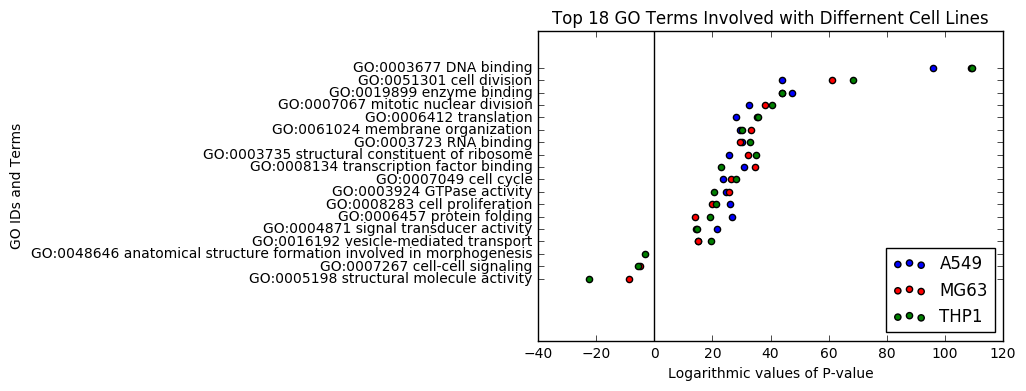

In [25]:
def creatax(tup, gos): #convert x into numbers, each coordinated w a GO ID string in golist
    y=[]
    x=[]
    for a,b in tup: 
        for i in xrange(len(gos)): 
            if gos[i] == a: 
                y.append(b)
                x.append(i)
    return (x, y)

ya= creatax(atup, golist)[1] #y values for GO IDs in Cell Line A549
yb= creatax(btup, golist)[1] #y values for GO IDs  in Cell Line MG63
yc= creatax(ctup, golist)[1] #y values for GO IDs in Cell Line THP1
xa= creatax(atup, golist)[0] #x values for GO IDs in Cell Line A549
xb= creatax(btup, golist)[0] #x values for GO IDs  in Cell Line MG63
xc= creatax(ctup, golist)[0] #x values for GO IDs in Cell Line THP1

fig= plt.figure()
ax1= fig.add_subplot(111)
ax1.scatter(ya, xa, c= 'b', marker= 'o', label= 'A549')
ax1.scatter(yb, xb, c= 'r', marker= 'o', label= 'MG63')
ax1.scatter(yc, xc, c= 'g', marker= 'o', label= 'THP1')
plt.yticks(gorange, golist, rotation= 'horizontal')
plt.legend(loc= 'lower right')

fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
# fig_size[0]= 10
# fig_size[1]= 7
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Logarithmic values of P-value')
plt.ylabel('GO IDs and Terms')
plt.axvline(0, color= 'black')
plt.title('Top 18 GO Terms Involved with Differnent Cell Lines')
plt.show()


The GO ids that seem the most differentially expressed include 5198, 4871, 16192, 6457

In [26]:
sortedall= sorted(compiledict.items(), key= operator.itemgetter(1))
tlist= [a for a,b in sortedall]
trange= range(len(tlist))

In [47]:
ya= creatax(atup, tlist)[1] #y values for GO IDs in Cell Line A549
yb= creatax(btup, tlist)[1] #y values for GO IDs  in Cell Line MG63
yc= creatax(ctup, tlist)[1] #y values for GO IDs in Cell Line THP1
xa= creatax(atup, tlist)[0] #x values for GO IDs in Cell Line A549
xb= creatax(btup, tlist)[0] #x values for GO IDs  in Cell Line MG63
xc= creatax(ctup, tlist)[0] #x values for GO IDs in Cell Line THP1

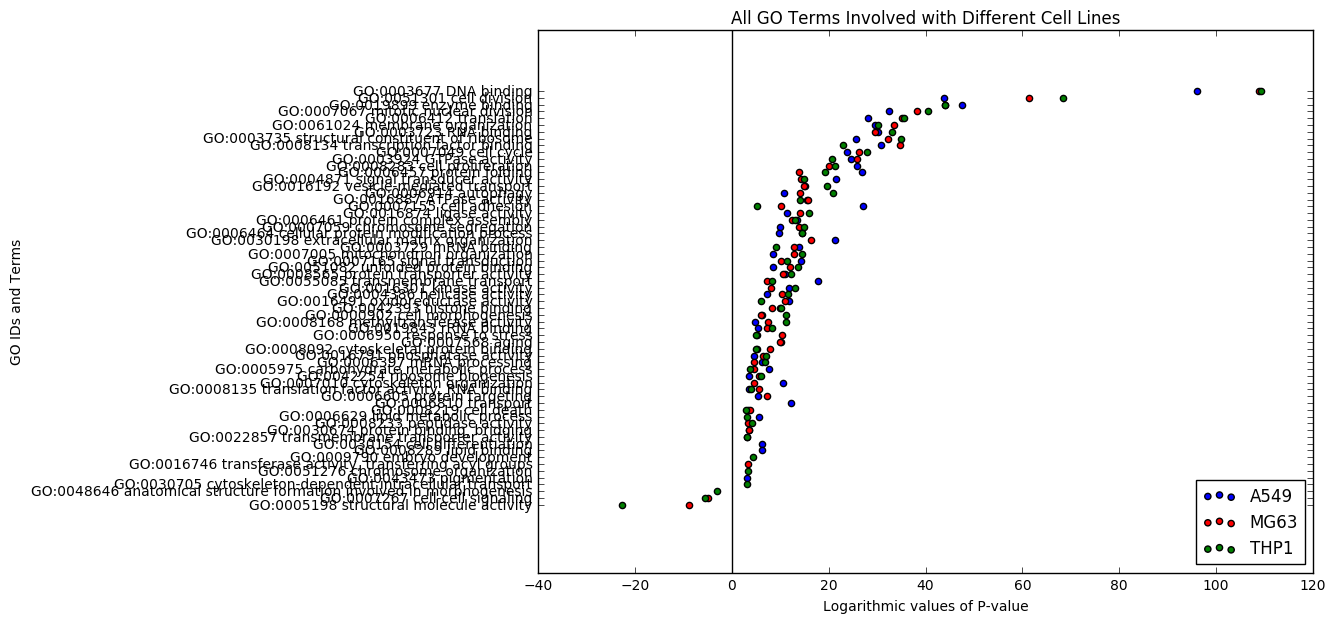

In [48]:
fig= plt.figure()
ax1= fig.add_subplot(111)
ax1.scatter(ya, xa, c= 'b', marker= 'o', label= 'A549')
ax1.scatter(yb, xb, c= 'r', marker= 'o', label= 'MG63')
ax1.scatter(yc, xc, c= 'g', marker= 'o', label= 'THP1')
plt.yticks(trange, tlist, rotation= 'horizontal')
plt.legend(loc= 'lower right')

fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 38
fig_size[1]= 23
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Logarithmic values of P-value')
plt.ylabel('GO IDs and Terms')
plt.axvline(0, color= 'black')
plt.title('All GO Terms Involved with Different Cell Lines')
plt.savefig('Plot of All Significant GO terms')
plt.show()

In [29]:
#gotermlist= ['5829', '5654', '5634', '5737']
def genelist(goid, goea):
    for x in goea: 
        if goid in x.__dict__.get('GO'): 
            glist= x.__dict__.get('study_items')
            break;
    return glist

# a5829 = genelist(gotermlist[0], goea_results_sig_a)
# a5654= genelist(gotermlist[1], goea_results_sig_a)
# a5634= genelist(gotermlist[2], goea_results_sig_a)
# a5737= genelist(gotermlist[3], goea_results_sig_a)

# b5829 = genelist(gotermlist[0], goea_results_sig_b)
# b5654= genelist(gotermlist[1], goea_results_sig_b)
# b5634= genelist(gotermlist[2], goea_results_sig_b)
# b5737= genelist(gotermlist[3], goea_results_sig_b)

# c5829 = genelist(gotermlist[0], goea_results_sig_c)
# c5654= genelist(gotermlist[1], goea_results_sig_c)
# c5634= genelist(gotermlist[2], goea_results_sig_c)
# c5737= genelist(gotermlist[3], goea_results_sig_c)

a5198= genelist('5198', goea_results_all_a)
b5198= genelist('5198', goea_results_all_b)
c5198= genelist('5198', goea_results_all_c)

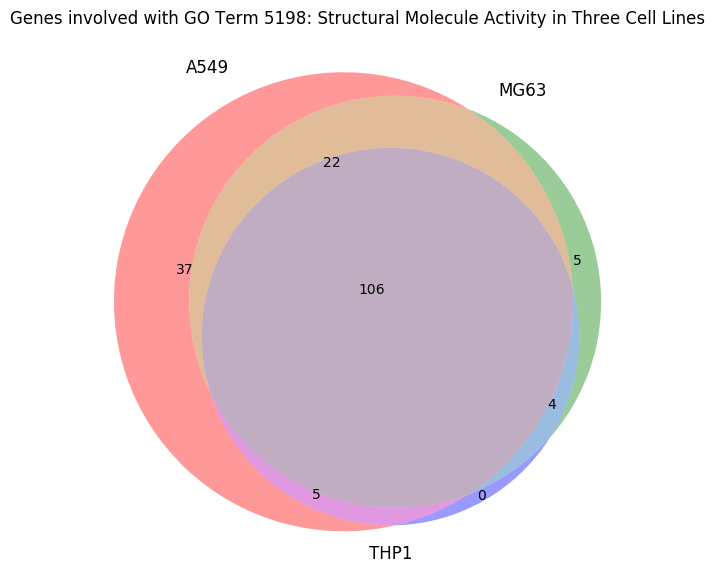

In [50]:
venn3([a5198, b5198, c5198], ('A549', 'MG63', 'THP1')) #THP1 looked more depleted than MG63 from graph
fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 10
fig_size[1]= 7
plt.rcParams["figure.figsize"] = fig_size
plt.title("Genes involved with GO Term 5198: Structural Molecule Activity in Three Cell Lines")
plt.show()

In [31]:
diffb= c5198 & a5198 - b5198
print(diffb) #genes only found only in both THP1 and A549 but not MG63 that relate to depletion of GO ID 5198. 

set([4744, 3859, 160492, 1365, 340990])


Can infer that these genes, which are only found in THP1 and A549, are responsible for the increased depletion in THP1. 

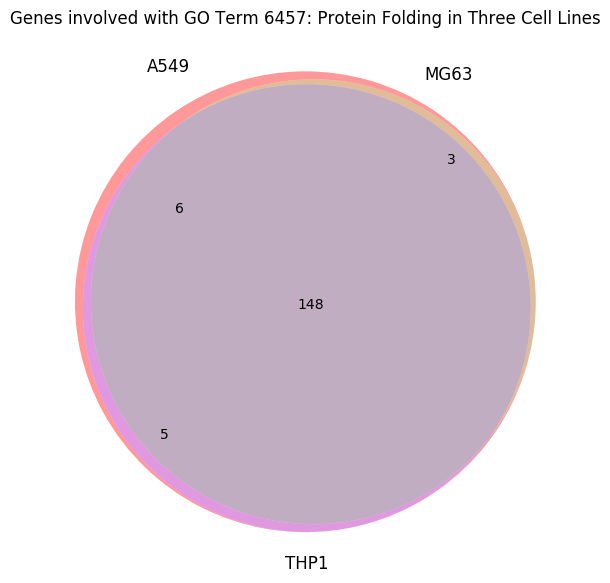

In [32]:
a6457= genelist('6457', goea_results_all_a) #mg63 significnantly lower than rest
b6457= genelist('6457', goea_results_all_b)
c6457= genelist('6457', goea_results_all_c)
venn3([a6457, b6457, c6457], ('A549', 'MG63', 'THP1'))
fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 10
fig_size[1]= 7
plt.rcParams["figure.figsize"] = fig_size
plt.title("Genes involved with GO Term 6457: Protein Folding in Three Cell Lines")
plt.show()

Since the go term relates to the cytosol, it makes sense that most of the genes would be overlapping betqeen the three lines. I will need to look into significant GO terms only related to molecular function (MF) and biological processes (BP).
<li> Need to filter GO IDs into BP and MF only, using key= 'NS'
<li> if above 300-400 in log value, differences dont really matter. Need to see bigger differences between small and big p values
<li> for bone cells- expect to see something related to bone, for THP1, something for immune system
<li> A549- lung cancer, MG63- bone cancer, THP1- acute leukemia

In [33]:
def sortdist(a, b, c): #sort GO terms by distance of pvalues from each other for each cell line 
    sortlist= []
    for x1, y1 in a: 
        for x2, y2 in b: 
            for x3, y3 in c: 
                if (x1 == x2 == x3):
                    dist= abs(y1 - y2) + abs(y1 - y3) + abs(y2 - y3)
                    sortlist.append((x1, dist))
    return sorted(sortlist, key= lambda tup: -tup[1])

dtup= sortdist(atup, btup, ctup)
dlist= [a for a,b in dtup][:15]
drange= range(len(dlist))
print(dlist)

['GO:0051301 cell division', 'GO:0007155 cell adhesion', 'GO:0003677 DNA binding', 'GO:0006457 protein folding', 'GO:0008134 transcription factor binding', 'GO:0055085 transmembrane transport', 'GO:0006914 autophagy', 'GO:0003735 structural constituent of ribosome', 'GO:0007067 mitotic nuclear division', 'GO:0006412 translation', 'GO:0004871 signal transducer activity', 'GO:0008168 methyltransferase activity', 'GO:0008283 cell proliferation', 'GO:0007005 mitochondrion organization', 'GO:0016491 oxidoreductase activity']


In [51]:
ya= creatax(atup, dlist)[1] #y values for GO IDs in Cell Line A549
yb= creatax(btup, dlist)[1] #y values for GO IDs  in Cell Line MG63
yc= creatax(ctup, dlist)[1] #y values for GO IDs in Cell Line THP1
xa= creatax(atup, dlist)[0] #x values for GO IDs in Cell Line A549
xb= creatax(btup, dlist)[0] #x values for GO IDs  in Cell Line MG63
xc= creatax(ctup, dlist)[0] #x values for GO IDs in Cell Line THP1

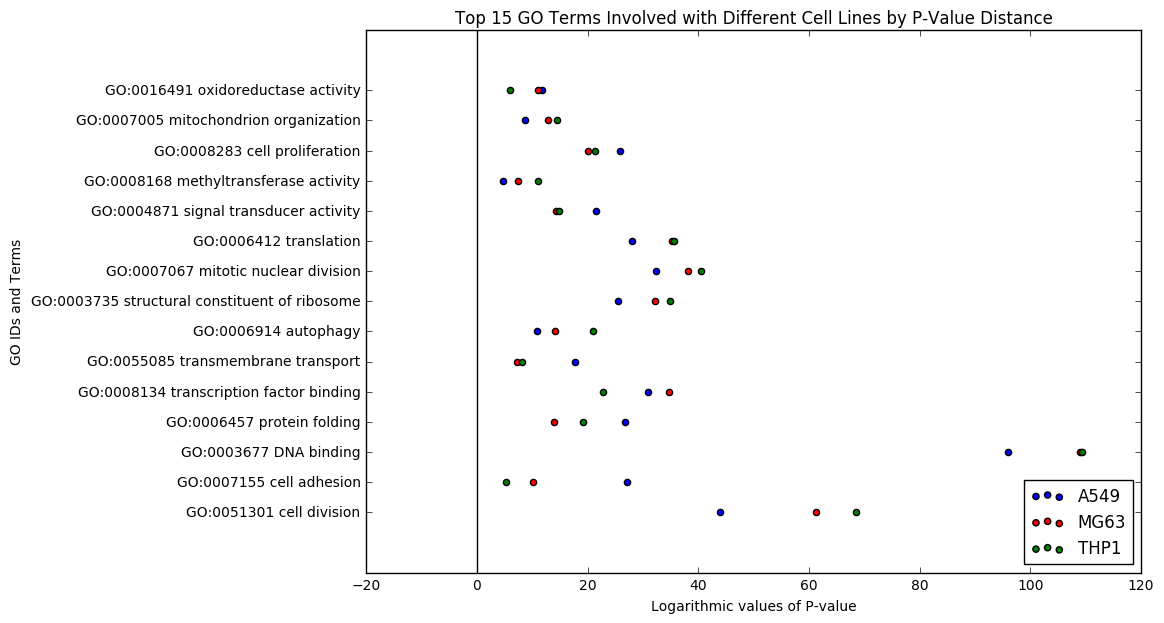

In [52]:
fig= plt.figure()
ax1= fig.add_subplot(111)
ax1.scatter(ya, xa, c= 'b', marker= 'o', label= 'A549')
ax1.scatter(yb, xb, c= 'r', marker= 'o', label= 'MG63')
ax1.scatter(yc, xc, c= 'g', marker= 'o', label= 'THP1')
plt.yticks(drange, dlist, rotation= 'horizontal')
plt.legend(loc= 'lower right')

fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 38
fig_size[1]= 23
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Logarithmic values of P-value')
plt.ylabel('GO IDs and Terms')
plt.axvline(0, color= 'black')
plt.title('Top 15 GO Terms Involved with Different Cell Lines by P-Value Distance')
plt.savefig('Plot of All Significant GO terms')
plt.show()

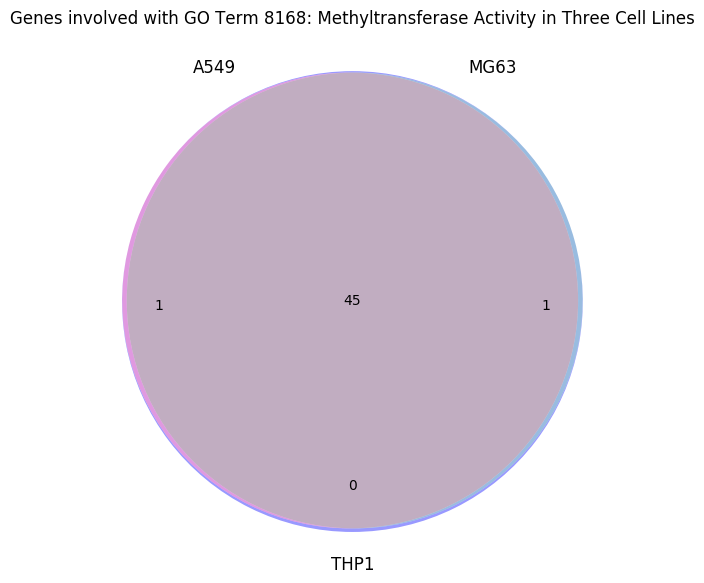

In [65]:
a= genelist('8168', goea_results_all_a)
b= genelist('8168', goea_results_all_b)
c= genelist ('8168', goea_results_all_c)
venn3([a, b, c], ('A549', 'MG63', 'THP1'))
fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 10
fig_size[1]= 7
plt.rcParams["figure.figsize"] = fig_size
plt.title("Genes involved with GO Term 8168: Methyltransferase Activity in Three Cell Lines")
plt.show()

In [37]:
acgene= a - b 
print(acgene)
bgene= b - a - c
print(bgene)
bcgene= b - a
print(bcgene)

set([63978])
set([])
set([728464])


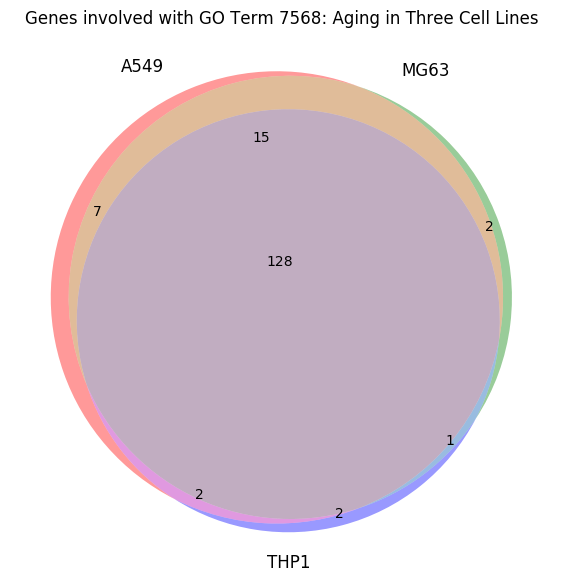

In [38]:
a= genelist('7568', goea_results_all_a)
b= genelist('7568', goea_results_all_b)
c= genelist ('7568', goea_results_all_c)
venn3([a, b, c], ('A549', 'MG63', 'THP1'))
fig_size = plt.rcParams["figure.figsize"]
#print('Current figure size',  fig_size)
fig_size[0]= 10
fig_size[1]= 7
plt.rcParams["figure.figsize"] = fig_size
plt.title("Genes involved with GO Term 7568: Aging in Three Cell Lines")
plt.show()

In [39]:
cgene = c - b - a
print(cgene) #genes that make THP1 not as enriched as MG63 Aging?

set([4353, 3586])


In [40]:
def converstring(idlist):
    list1= list(idlist)
    string= ''
    for x in list1:
        string += str(x) + ', '
    return string[0:len(string)-2]

print(converstring(cgene))

4353, 3586


In [66]:
import plotly.plotly as py
import plotly.figure_factory as ff

def pval(goid, results):
    for x in results:
        if x.__dict__.get('GO')+ ' ' + x.__dict__.get('name') == goid: 
            pval= x.__dict__.get('p_fdr_bh')
    return pval

def genes(goid, results): 
    for x in results:
        if x.__dict__.get('GO')+ ' ' + x.__dict__.get('name') == goid: 
            glist= x.__dict__.get('study_items')
    return glist
        
def createtable (golist, aset, bset, cset):
    tlist= []
    tlist.append(['GO Term', 'Unique Genes in A549', 'P-value of A549', 'Unique Genes in MG63', 'P-value of MG63', 'Unique Genes in THP1', 'P-value of THP1'])
    for id in golist: 
        unit= []
        unit.append(id)
        unit.append(converstring(genes(id, aset) - genes(id, bset) - genes(id, cset)))
        unit.append(pval(id, aset))
        unit.append(converstring(genes(id, bset) - genes(id, aset) - genes(id, cset)))
        unit.append(pval(id, bset))
        unit.append(converstring(genes(id, cset) - genes(id, aset) - genes(id, bset)))
        unit.append(pval(id, cset))
        tlist.append(unit)
    return tlist

matrix = createtable(dlist, goea_results_all_a, goea_results_all_b, goea_results_all_c)


In [67]:
import pandas as pd
#labels= ['GO Term', 'Unique Genes in A549', 'P-value of A549', 'Unique Genes in MG63', 'P-value of MG63', 'Unique Genes in THP1', 'P-value of THP1']
labels= matrix.pop(0)
df= pd.DataFrame.from_records(matrix, columns= labels)
df

,GO Term,Unique Genes in A549,P-value of A549,Unique Genes in MG63,P-value of MG63,Unique Genes in THP1,P-value of THP1
0,GO:0051301 cell division,346288,8.837366e-20,,2.309375e-27,6847,1.852198e-30
1,GO:0007155 cell adhesion,"171169, 258, 22915, 8581, 3558, 6247, 56136, 9...",1.577479e-12,"3036, 6356",3.974970e-05,"131873, 89858, 4099, 6504, 8778, 27181, 6351, ...",4.989211e-03
2,GO:0003677 DNA binding,"85508, 4613, 8328, 12, 11281, 140690, 503835, ...",1.968769e-42,"6910, 90589, 7021, 342926, 90485",5.072441e-48,"221504, 1602, 256297, 4332, 1961, 8361, 4762, ...",3.420122e-48
3,GO:0006457 protein folding,"346562, 325, 644591, 728945, 204474, 653598",2.239358e-12,,9.062419e-07,,4.548236e-09
4,GO:0008134 transcription factor binding,"6736, 6663, 4654, 8431, 390992, 50964, 186",4.078572e-14,"375611, 6910",9.102646e-16,"4760, 643904",1.166146e-10
5,GO:0055085 transmembrane transport,"6529, 60482, 64241, 729025, 9058, 2705, 2707, ...",1.904070e-08,,7.617959e-04,"6555, 1446",2.716172e-04
6,GO:0006914 autophagy,,1.981613e-05,,7.332693e-07,,8.176807e-10
7,GO:0003735 structural constituent of ribosome,140801,7.717112e-12,,9.922062e-15,,6.654266e-16
8,GO:0007067 mitotic nuclear division,"57348, 494551",8.230799e-15,,2.520734e-17,,2.711693e-18
9,GO:0006412 translation,140801,6.579184e-13,,5.008965e-16,,3.695505e-16


In [44]:
tmatrix= createtable(tlist, goea_results_all_a, goea_results_all_b, goea_results_all_c)
tlabel= tmatrix.pop(0)
dt= pd.DataFrame.from_records(tmatrix, columns= tlabel)
dt

,GO Term,Unique Genes in A549,P-value of A549,Unique Genes in MG63,P-value of MG63,Unique Genes in THP1,P-value of THP1
0,GO:0005198 structural molecule activity,"25984, 1538, 140807, 353288, 23562, 3853, 5454...",6.936211e-01,"390792, 83897, 125115, 353133, 54221",1.537188e-04,,1.582517e-10
1,GO:0007267 cell-cell signaling,"79368, 2701, 2705, 2069, 6863, 114335, 114336,...",1.000000e+00,"7200, 651, 4908, 3440, 55801, 6910",6.885974e-03,"6368, 3586, 2251, 1234, 7471, 946, 6357, 6361,...",3.834665e-03
2,GO:0048646 anatomical structure formation invo...,,3.143087e-01,,1.887735e-01,,4.419271e-02
3,GO:0030705 cytoskeleton-dependent intracellula...,,2.300703e-01,,6.860417e-02,,4.500092e-02
4,GO:0043473 pigmentation,"7054, 51350",4.139557e-02,,1.938786e-01,,8.858687e-01
5,GO:0051276 chromosome organization,,1.422475e-01,,2.842031e-01,,3.261811e-02
6,"GO:0016746 transferase activity, transferring ...",,4.457146e-01,10249,3.240899e-02,,8.620429e-01
7,GO:0009790 embryo development,,2.661911e-01,,1.670610e-01,"256297, 6997",1.187047e-02
8,GO:0008289 lipid binding,"51297, 149954, 266629, 92747, 345456, 337, 869...",2.097681e-03,"2173, 80831",1.564036e-01,2864,5.809696e-02
9,GO:0030154 cell differentiation,"640, 1538, 4745, 79755, 155465, 339345, 390874...",2.003164e-03,"100528032, 219793, 22914, 83893",5.096299e-02,"92196, 6997",4.961149e-01


In [64]:
dt.to_csv('allgenes.csv')
df.to_csv('top15genes.csv')